# Setup

## Installs

In [282]:
import pandas as pd
from matplotlib import pyplot as plt
from enum import Enum
import numpy as np

## Load data

In [283]:
df_init = pd.read_csv('../data/coded/complete.tsv', sep='\t')

In [284]:
df = df_init.copy()
df

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Taylor Swift Will Seemingly Attend Beyonce's M...,Taylor Swift missed out on an exciting opportu...,NaN,NaN,NaN,NaN,NaN,NaN,Renaissance,Promo
1,How Donnie Darko And Martin Scorsese Influence...,"Believe it or not, the star and director of Fi...",NaN,NaN,NaN,NaN,NaN,NaN,FNAF,Prod
2,The Marvels Is On Track For One Of The MCU's L...,Bad news for The Marvels: the latest from the ...,NaN,NaN,NaN,NaN,NaN,NaN,Marvels,Box
3,"Leonardo DiCaprio Reacts to Rapping Video, Rev...",Leonardo DiCaprio is speaking out about the vi...,NaN,NaN,NaN,NaN,NaN,NaN,KOTFM,Promo
4,The Marvels Star Iman Vellani Talks Working Wi...,We spoke with The Marvels star Iman Vellani ab...,NaN,NaN,NaN,NaN,NaN,NaN,Marvels,Promo
...,...,...,...,...,...,...,...,...,...,...
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,NaN,Nolin,FNAF,Promo,NR,NaN
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
490,The Book You Should Read If You Love – Or Hate...,Ridley Scott&amp;#39;s Napoleon isn&amp;#39;t ...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


## Utils

In [285]:
class Headers(Enum):
    coder1 = "coder 1"
    movie1 = "movie 1"
    topic1 = "topic 1"
    coder2 = "coder 2"
    movie2 = "movie 2"
    topic2 = "topic 2"
    final_movie = "final movie"
    final_topic = "final topic"
    title = "title"
    description = "description"


class Movies(Enum):
    Renaissance = "Renaissance"
    Godzilla = "Godzilla"
    Napoleon = "Napoleon"
    Wish = "Wish"
    HG = "HG"
    Trolls = "Trolls"
    Thanksgiving = "Thanksgiving"
    Marvels = "Marvels"
    FNAF = "FNAF"
    After_Death = "After Death"
    KOTFM = "KOTFM"
    Not_mentioned = "NM"
    Not_relevant = "NR"
    Not_coded = 'N/C'


def full_movie(movie: Movies):
    match movie.value:
        case Movies.Renaissance.value:
            return "Renaissance: a film by beyonce"
        case Movies.Godzilla.value:
            return "Godzilla Minus One"
        case Movies.Napoleon.value:
            return "Napoleon"
        case Movies.Wish.value:
            return "Wish"
        case Movies.HG.value:
            return "The Hunger Games: The Ballad of Songbirds & Snakes"
        case Movies.Trolls.value:
            return "Trolls Band Together"
        case Movies.Thanksgiving.value:
            return "Thanksgiving"
        case Movies.Marvels.value:
            return "The Marvels"
        case Movies.FNAF.value:
            return "Five Nights at Freddy's"
        case Movies.After_Death.value:
            return "After Death"
        case Movies.KOTFM.value:
            return "Killers of the Flower Moon"


class Topics(Enum):
    Box = "Box"
    NR = "NR"
    Streaming = "Streaming"
    Prod = "Prod"
    Plot = "Plot"
    Awards = "Awards"
    Promo = "Promo"
    Not_coded = 'N/C'


def full_topic(topic: Topics):
    match topic.value:
        case Topics.Box.value:
            return 'Box Office'
        case Topics.NR.value:
            return 'Movie only mentioned'
        case Topics.Streaming.value:
            return Topics.Streaming.value
        case Topics.Prod.value:
            return 'Production'
        case Topics.Plot.value:
            return 'Plot and performances'
        case Topics.Awards.value:
            return Topics.Awards.value
        case Topics.Promo.value:
            return 'Promotion'


class Coders(Enum):
    Tristan = "Tristan"
    Juan = "Juan"
    Michael = "Michael"
    Jean_Alexandre = "Jean-Alexandre"
    No_coder = 'N/C'


## Clean

In [286]:
def movie_should_not_have_topic(movie):
    return movie != Movies.Not_coded.value and \
        movie != Movies.Not_relevant.value and \
        movie != Movies.Not_mentioned.value

In [287]:
def clean_topics(df_to_clean):
    def clean_topic(topic_header, movie_header):
        missing_mask = df_to_clean[topic_header].isna()
        mapping = dict({Movies.Not_coded.value: Topics.Not_coded.value,
                        Movies.Not_relevant.value: Topics.Not_coded.value,
                        Movies.Not_mentioned.value: Topics.Not_coded.value, })
        df_to_clean.loc[missing_mask, topic_header] = df_to_clean.loc[
            missing_mask, movie_header].map(mapping)

    df_to_clean = df_to_clean.copy()
    clean_topic(Headers.topic1.value, Headers.movie1.value)
    clean_topic(Headers.topic2.value, Headers.movie2.value)
    clean_topic(Headers.final_topic.value, Headers.final_movie.value)
    return df_to_clean



In [288]:
df_clean = df.copy()
df_clean = df_clean.dropna(axis=0, how='all')
df_clean.tail()

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,NaN,Nolin,FNAF,Promo,NR,NaN
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
490,The Book You Should Read If You Love – Or Hate...,Ridley Scott&amp;#39;s Napoleon isn&amp;#39;t ...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


In [289]:
df_clean[Headers.coder1.value] = df_clean[Headers.coder1.value].fillna(
    Coders.No_coder.value)
df_clean[Headers.coder2.value] = df_clean[Headers.coder2.value].fillna(
    Coders.No_coder.value)
df_clean[Headers.movie1.value] = df_clean[Headers.movie1.value].fillna(
    Movies.Not_coded.value)
df_clean[Headers.movie2.value] = df_clean[Headers.movie2.value].fillna(
    Movies.Not_coded.value)
df_clean = clean_topics(df_clean)
df_clean.tail()

,title,description,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
486,Kamala Khan Is Marvel’s Not-So-Secret Weapon,Iman Vellani's wide-eyed teen hero is the savi...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot
487,What's The 'O Cholera Czy To Freddy Fazbear' M...,"A Polish man's viral video sparked a classic ""...",Juan,NR,N/C,Nolin,FNAF,Promo,NR,N/C
488,Three Awards Bodies Walk Into a Movies Fantasy...,"New York Film Critics Circle, National Board o...",Juan,NM,N/C,Nolin,NM,N/C,NM,N/C
489,2024 Oscars shaping up as a 'Barbenheimer' sequel,"Barbie and ""Oppenheimer"" ruled the summer. Now...",Juan,NM,N/C,Nolin,NM,N/C,NM,N/C
490,The Book You Should Read If You Love – Or Hate...,Ridley Scott&amp;#39;s Napoleon isn&amp;#39;t ...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


# Analysis

## Movie counts

In [290]:
col = Headers.final_movie.value
df_counts = df_clean.copy()
df_counts[col] = df_counts[col].str.split(", ")
counts = df_counts[col].explode(col).value_counts()
counts

final movie
KOTFM          96
HG             87
Marvels        76
NM             63
Godzilla       57
Napoleon       51
NR             30
Renaissance    24
Trolls         22
FNAF           19
Wish           19
Name: count, dtype: int64

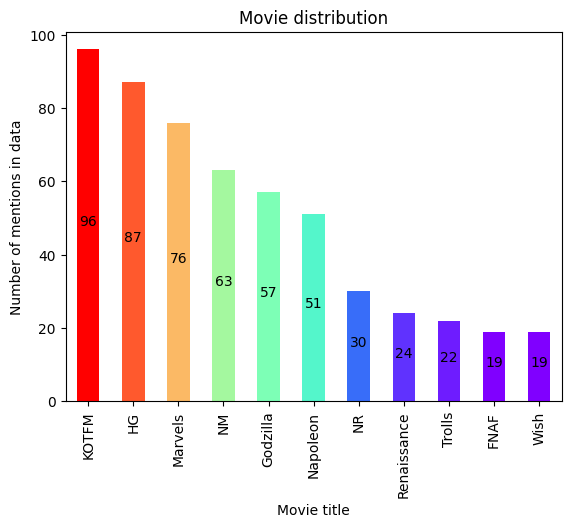

In [291]:
cmap = plt.colormaps['rainbow']
norm = plt.Normalize(counts.min(), counts.max())
colors = [cmap(norm(value)) for value in counts.values]

ax = counts.plot(kind='bar', color=colors)
ax.set_ylabel('Number of mentions in data')
ax.set_xlabel('Movie title')
ax.set_title('Movie distribution')

for i, v in enumerate(counts.values):
    ax.text(i, v / 2, str(v), color='black', ha='center')

plt.savefig('./final_figs/Movie distribution.png', bbox_inches='tight')
plt.show()

## Topic analysis

In [292]:
df_topics = df_clean.copy()

col = Headers.final_topic.value

df_topics = df_topics[df_topics[col] != Topics.Not_coded.value]
df_topics = df_topics[
    df_topics[Headers.final_movie.value] != Movies.Not_mentioned.value]
df_topics[col] = df_topics[col].map(lambda topic: full_topic(Topics[topic]))
topic_counts = df_topics[col].value_counts()
topic_counts

final topic
Box Office               119
Plot and performances    117
Promotion                 59
Movie only mentioned      30
Streaming                 27
Awards                    24
Production                22
Name: count, dtype: int64

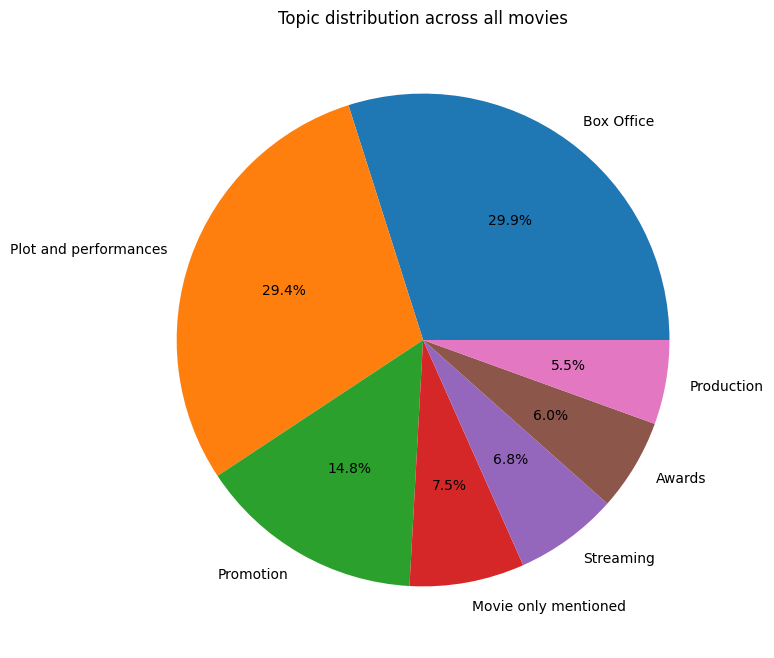

In [293]:
topic_counts.plot(kind='pie', subplots=True, figsize=(12, 8),
                  autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
plt.title('Topic distribution across all movies')
plt.ylabel('')
plt.savefig('./final_figs/Total topic distribution.png')
plt.show()

In [294]:
col = Headers.final_movie.value

df_topics_by_movie = df_topics.copy()
df_topics_by_movie[col] = df_topics_by_movie[col].str.split(', ')
df_topics_by_movie[col] = df_topics_by_movie[col].explode(col)
df_topics_by_movie = df_topics_by_movie.groupby(col)
topics_by_movie_counts = df_topics_by_movie[
    Headers.final_topic.value].value_counts()
topics_by_movie_counts

final movie  final topic          
FNAF         Plot and performances     4
             Box Office                2
             Movie only mentioned      2
             Streaming                 2
             Production                2
             Promotion                 1
Godzilla     Box Office               15
             Plot and performances    10
             Promotion                 7
             Awards                    5
             Production                3
             Streaming                 3
             Movie only mentioned      2
HG           Box Office               19
             Plot and performances    19
             Promotion                10
             Streaming                 5
             Movie only mentioned      4
             Awards                    4
             Production                4
KOTFM        Box Office               29
             Plot and performances    24
             Promotion                 9
             Movie onl

In [295]:
unstacked = topics_by_movie_counts.unstack(level=0)
unstacked

final movie,FNAF,Godzilla,HG,KOTFM,Marvels,Napoleon,Renaissance,Trolls,Wish
final topic,,,,,,,,,
Awards,NaN,5.0,4.0,5.0,3.0,2.0,2.0,1.0,NaN
Box Office,2.0,15.0,19.0,29.0,17.0,13.0,7.0,1.0,6.0
Movie only mentioned,2.0,2.0,4.0,7.0,5.0,5.0,1.0,3.0,NaN
Plot and performances,4.0,10.0,19.0,24.0,24.0,10.0,6.0,6.0,6.0
Production,2.0,3.0,4.0,3.0,1.0,3.0,1.0,2.0,NaN
Promotion,1.0,7.0,10.0,9.0,9.0,6.0,3.0,2.0,4.0
Streaming,2.0,3.0,5.0,6.0,2.0,3.0,1.0,3.0,1.0


In [296]:
titles = [tup for tup in unstacked]
titles = [full_movie(Movies[title]) for title in titles]
titles

["Five Nights at Freddy's",
 'Godzilla Minus One',
 'The Hunger Games: The Ballad of Songbirds & Snakes',
 'Killers of the Flower Moon',
 'The Marvels',
 'Napoleon',
 'Renaissance: a film by beyonce',
 'Trolls Band Together',
 'Wish']

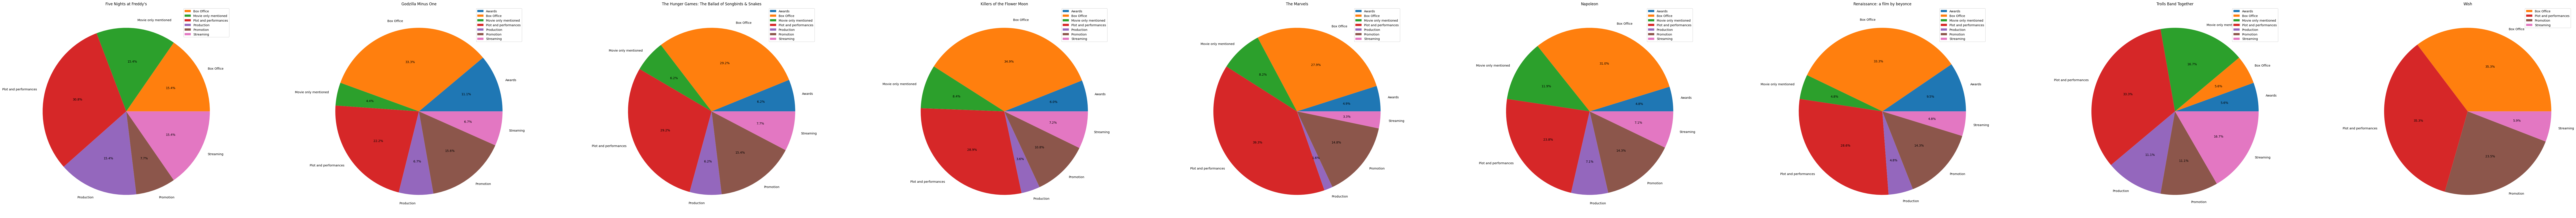

In [297]:
fig = unstacked.plot(kind='pie', subplots=True, figsize=(120, 10),
                     autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
axes = fig.flatten()
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_ylabel(None)

plt.tight_layout()
plt.savefig('./final_figs/Topics per movie.png')
plt.show()